# 도축개월 Full

In [1]:
import pandas as pd
import numpy as np
import math
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
from matplotlib import font_manager, rc
font_path= 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [3]:
df = pd.read_excel('도축예측모델 검증 리스트-암소전체-230526-키우소.xlsx')
df.head()

,우시장 암소,도축개월령,암소 생시체중,농가번호,도축 형매수,형매 도체중 평균,형매 등심단면적 평균,형매 등지방 평균,형매 근내지방도 평균,부KPN 개월별 근내지방도 평균,농가 도축소 근내지방도 평균,도축소 근내지방도,Probability
0,2159437849,28,624,410188,0,0.0,0.0,0.0,0.0,6.57,6.00,6,NaN
1,2154149276,31,665,466490,0,0.0,0.0,0.0,0.0,6.50,0.00,4,NaN
2,2155409528,33,596,444538,4,343.5,69.0,10.5,4.5,6.49,5.75,9,NaN
3,2154224882,33,635,462483,0,0.0,0.0,0.0,0.0,6.41,0.00,5,NaN
4,2155249844,32,658,471725,1,351.0,90.0,14.0,4.0,6.38,0.00,7,NaN


##### 도축개월 28~35개월임을 확인

In [4]:
df.describe()

,우시장 암소,도축개월령,암소 생시체중,농가번호,도축 형매수,형매 도체중 평균,형매 등심단면적 평균,형매 등지방 평균,형매 근내지방도 평균,부KPN 개월별 근내지방도 평균,농가 도축소 근내지방도 평균,도축소 근내지방도,Probability
count,7.940000e+02,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.00000,794.000000,0.0
mean,2.154011e+09,32.401763,633.328715,316547.950882,0.700252,134.041209,29.494270,4.144207,1.700605,4.990705,3.07665,4.749370,NaN
std,2.883963e+06,2.124391,66.771119,135205.768178,1.335640,198.145208,43.506286,6.464474,2.669521,0.602637,2.54946,1.929111,NaN
min,2.142767e+09,28.000000,361.000000,18048.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.00000,1.000000,NaN
25%,2.152203e+09,31.000000,588.000000,180095.750000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570000,0.00000,3.000000,NaN
50%,2.153915e+09,33.000000,630.000000,351326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.015000,4.00000,5.000000,NaN
75%,2.155733e+09,34.000000,674.000000,448313.000000,1.000000,381.627500,84.627500,10.000000,4.000000,5.390000,5.20000,6.000000,NaN
max,2.166287e+09,35.000000,890.000000,475431.000000,8.000000,572.000000,135.000000,29.000000,9.000000,6.570000,9.00000,9.000000,NaN


#### 계산기 만들기

In [5]:
df_copy = df.copy()
df_copy.head()

,우시장 암소,도축개월령,암소 생시체중,농가번호,도축 형매수,형매 도체중 평균,형매 등심단면적 평균,형매 등지방 평균,형매 근내지방도 평균,부KPN 개월별 근내지방도 평균,농가 도축소 근내지방도 평균,도축소 근내지방도,Probability
0,2159437849,28,624,410188,0,0.0,0.0,0.0,0.0,6.57,6.00,6,NaN
1,2154149276,31,665,466490,0,0.0,0.0,0.0,0.0,6.50,0.00,4,NaN
2,2155409528,33,596,444538,4,343.5,69.0,10.5,4.5,6.49,5.75,9,NaN
3,2154224882,33,635,462483,0,0.0,0.0,0.0,0.0,6.41,0.00,5,NaN
4,2155249844,32,658,471725,1,351.0,90.0,14.0,4.0,6.38,0.00,7,NaN


##### TARGET1(789) 확률계산

In [6]:
# 농장 등급 만들기
df_copy['농장등급A'] = df_copy['농가 도축소 근내지방도 평균'].apply(lambda x: 1 if 7 <= x <=9 else 0)
df_copy['농장등급B'] = df_copy['농가 도축소 근내지방도 평균'].apply(lambda x: 1 if 4 <= x < 7 else 0)
print(f"농가등급A개수:{df_copy['농장등급A'].value_counts()}")
print('\n')
print(f"농가등급B개수:{df_copy['농장등급B'].value_counts()}")

농가등급A개수:농장등급A
0    772
1     22
Name: count, dtype: int64


농가등급B개수:농장등급B
0    404
1    390
Name: count, dtype: int64


In [7]:
# 확인
print(f"농가등급7이상:{len(df_copy[df_copy['농가 도축소 근내지방도 평균']>=7])}")
print(f"농가등급4이상7미만:{len(df_copy[(df_copy['농가 도축소 근내지방도 평균']<7)&(4<= df_copy['농가 도축소 근내지방도 평균'])])}")

농가등급7이상:22
농가등급4이상7미만:390


###### 반복문사용해서 만들기

In [9]:
for index, row in df_copy.iterrows():
    x = (-6.2728 - 0.0673 + (1.3871*row['농장등급A'])
         + (-0.3238*row['농장등급B']) + (-0.0032*row['도축개월령'])
         + (0.00663*(row['암소 생시체중']-269))
         + (-0.0022*row['형매 도체중 평균'])
         + (0.00009*row['형매 등심단면적 평균'])
         + (-0.0072*row['형매 등지방 평균'])
         + (0.1776*row['형매 근내지방도 평균'])
         + (0.00837*row['도축 형매수'])
         + (0.5892*row['부KPN 개월별 근내지방도 평균']))
    probability = np.exp(x) / (1 + np.exp(x))
    df_copy.loc[index, 'Probability'] = probability

# 결과 출력
# 도축개월 조정 확률계산기를 이용해 Probability가 일치함을 확인
df_copy.tail()

,우시장 암소,도축개월령,암소 생시체중,농가번호,도축 형매수,형매 도체중 평균,형매 등심단면적 평균,형매 등지방 평균,형매 근내지방도 평균,부KPN 개월별 근내지방도 평균,농가 도축소 근내지방도 평균,도축소 근내지방도,Probability,농장등급A,농장등급B
789,2153095125,33,658,311867,0,0.0,0.0,0.0,0.0,3.52,0.00,3,0.142749,0,0
790,2157236986,33,588,471726,0,0.0,0.0,0.0,0.0,3.41,0.00,3,0.089353,0,0
791,2155650857,33,587,141909,0,0.0,0.0,0.0,0.0,3.41,2.79,2,0.088815,0,0
792,2153729235,33,648,141447,1,439.0,82.0,13.0,2.0,3.41,5.92,6,0.050402,0,1
793,2152532574,34,633,109023,2,354.0,80.0,11.0,4.0,3.20,5.30,2,0.069293,0,1


In [10]:
df_copy['Probability'].describe()

count    794.000000
mean       0.245106
std        0.125219
min        0.046004
25%        0.158188
50%        0.219222
75%        0.302310
max        0.836470
Name: Probability, dtype: float64

##### TARGET1 PERFORMANCE

In [11]:
df_copy['TARGET1'] = df_copy['도축소 근내지방도'].apply(lambda x: 1 if 7 <= x <=9 else 0)
df_copy['Prob_5'] = df_copy['Probability'].apply(lambda x: 1 if 0.5 <= x else 0)
df_copy['Prob_6'] = df_copy['Probability'].apply(lambda x: 1 if 0.6 <= x else 0)
df_copy['Prob_7'] = df_copy['Probability'].apply(lambda x: 1 if 0.7 <= x else 0)
df_copy['Prob_8'] = df_copy['Probability'].apply(lambda x: 1 if 0.8 <= x else 0)
df_copy['Prob_9'] = df_copy['Probability'].apply(lambda x: 1 if 0.9 <= x else 0)

###### 변수변환 및 확인

In [12]:
print(f"7이상개수:{len(df_copy[df_copy['도축소 근내지방도']>=7])}")
print(f"TARGET1개수:{len(df_copy[df_copy['TARGET1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(df_copy[df_copy['Probability']>=0.5])}")
print(f"Prob_5개수:{len(df_copy[df_copy['Prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(df_copy[df_copy['Probability']>=0.6])}")
print(f"Prob_6개수:{len(df_copy[df_copy['Prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(df_copy[df_copy['Probability']>=0.7])}")
print(f"Prob_7개수:{len(df_copy[df_copy['Prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(df_copy[df_copy['Probability']>=0.8])}")
print(f"Prob_8개수:{len(df_copy[df_copy['Prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(df_copy[df_copy['Probability']>=0.9])}")
print(f"Prob_9개수:{len(df_copy[df_copy['Prob_9']==1])}")

7이상개수:111
TARGET1개수:111
0.5이상개수:32
Prob_5개수:32
0.6이상개수:19
Prob_6개수:19
0.7이상개수:11
Prob_7개수:11
0.8이상개수:2
Prob_8개수:2
0.9이상개수:0
Prob_9개수:0


##### PERFORMANCE CHECK

###### performance 측정 함수 정의

In [13]:
def performance(TP,TN,FP,FN):
    
    N = TP+TN+FP+FN
    
    Sensitivity=(TP/(TP+FN))*100
    Sensitivity_l=(Sensitivity/100-1.96*math.sqrt( (Sensitivity/100)*(1-(Sensitivity/100))/(TP+FN) ) )*100
    Sensitivity_u=(Sensitivity/100+1.96*math.sqrt( (Sensitivity/100)*(1-(Sensitivity/100))/(TP+FN) ) )*100

    Specificity=(1-FP/(TN+FP))*100
    Specificity_l=(Specificity/100-1.96*math.sqrt( (Specificity/100)*(1-(Specificity/100))/(FP+TN) ) )*100
    Specificity_u=(Specificity/100+1.96*math.sqrt( (Specificity/100)*(1-(Specificity/100))/(FP+TN) ) )*100

    Accuracy=((TP+TN)/(TP+TN+FP+FN))*100
    Accuracy_l=(Accuracy/100-1.96*math.sqrt( (Accuracy/100)*(1-(Accuracy/100))/N ) )*100
    Accuracy_u=(Accuracy/100+1.96*math.sqrt( (Accuracy/100)*(1-(Accuracy/100))/N ) )*100

    PPV= (TP/(TP+FP))*100 
    PPV_l=(PPV/100-1.96*math.sqrt( (PPV/100)*(1-(PPV/100))/(TP+FP) ) )*100
    PPV_u=(PPV/100+1.96*math.sqrt( (PPV/100)*(1-(PPV/100))/(TP+FP) ) )*100

    NPV= (TN/(TN+FN))*100 
    NPV_l=(NPV/100-1.96*math.sqrt( (NPV/100)*(1-(NPV/100))/(TN+FN) ) )*100
    NPV_u=(NPV/100+1.96*math.sqrt( (NPV/100)*(1-(NPV/100))/(TN+FN) ) )*100
    
    result = {
        'Metric': ['Sensitivity', 'Specificity', 'Accuracy', 'PPV', 'NPV'],
        'Value': [Sensitivity, Specificity, Accuracy, PPV, NPV],
        'CI_Lower': [Sensitivity_l, Specificity_l, Accuracy_l, PPV_l, NPV_l],
        'CI_Upper': [Sensitivity_u, Specificity_u, Accuracy_u, PPV_u, NPV_u]
    }
    
    result_2 = pd.DataFrame(result)
    
    return result_2

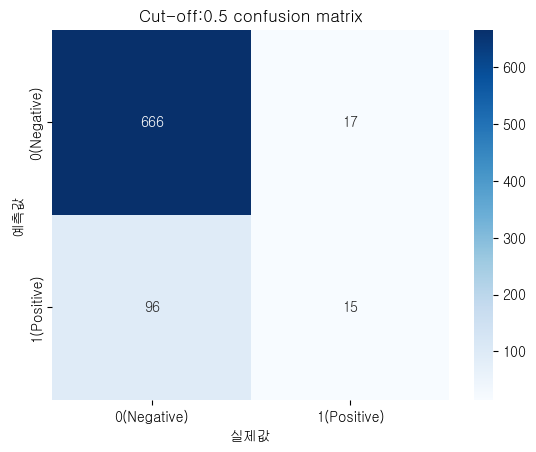

,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,46.875000,29.584753,64.165247
1,Specificity,87.401575,85.045461,89.757689
2,Accuracy,85.768262,83.338084,88.198440
3,PPV,13.513514,7.153576,19.873451
4,NPV,97.510981,96.342594,98.679368


In [18]:
# cut-off 0.5
cm = confusion_matrix(df_copy['TARGET1'], df_copy['Prob_5'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.5 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

performance(15,666,96,17)

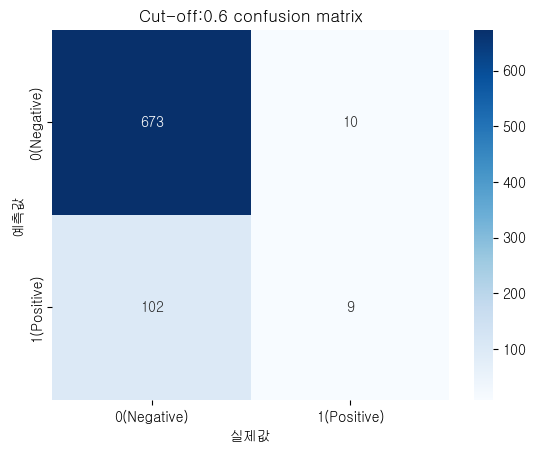

,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,47.368421,24.916840,69.820002
1,Specificity,86.838710,84.458522,89.218897
2,Accuracy,85.894207,83.473030,88.315383
3,PPV,8.108108,3.030105,13.186111
4,NPV,98.535871,97.635063,99.436680


In [19]:
# cut-off 0.6
cm = confusion_matrix(df_copy['TARGET1'], df_copy['Prob_6'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.6 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

performance(9,673,102,10)

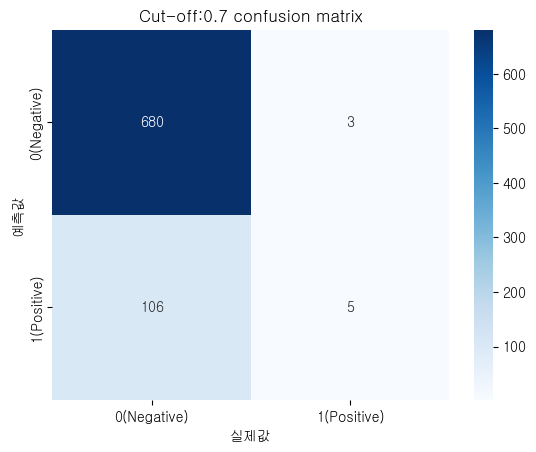

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       683
           1       0.62      0.05      0.08       111

    accuracy                           0.86       794
   macro avg       0.75      0.52      0.50       794
weighted avg       0.83      0.86      0.81       794



,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,62.500000,28.951993,96.048007
1,Specificity,86.513995,84.126021,88.901969
2,Accuracy,86.272040,83.878262,88.665818
3,PPV,4.504505,0.646084,8.362925
4,NPV,99.560761,99.064809,100.056714


In [63]:
# cut-off 0.7
cm = confusion_matrix(df_copy['TARGET1'], df_copy['Prob_7'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.7 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

report = classification_report(df_copy['TARGET1'], df_copy['Prob_7'])
print(report)

performance(5,680,106,3)

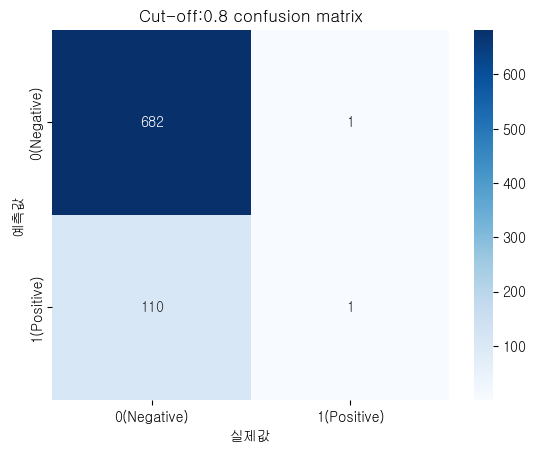

,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,50.000000,-19.296465,119.296465
1,Specificity,86.111111,83.702555,88.519668
2,Accuracy,86.020151,83.608041,88.432261
3,PPV,0.900901,-0.856893,2.658695
4,NPV,99.853587,99.566828,100.140346


In [21]:
# cut-off 0.8
cm = confusion_matrix(df_copy['TARGET1'], df_copy['Prob_8'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.8 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

performance(1,682,110,1)